<a href="https://colab.research.google.com/github/jack0928/computer-vision-fundamentals/blob/main/01_image_representation_and_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4.12.0
(948, 1434, 3)
<class 'numpy.ndarray'>


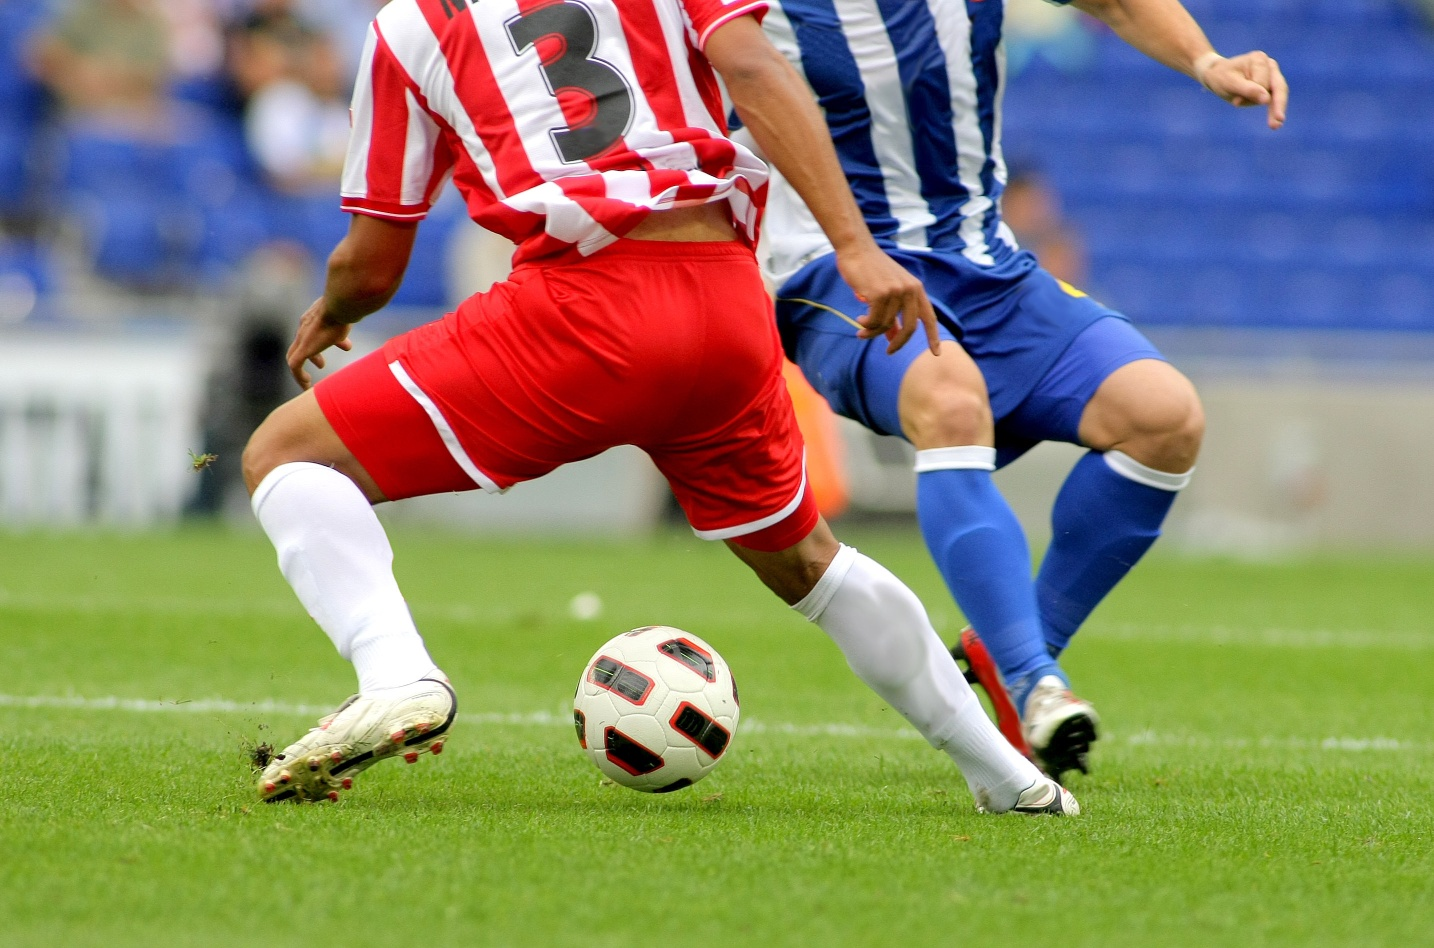

In [ ]:
import cv2 as cv
import sys
from google.colab.patches import cv2_imshow

print(cv.__version__)

img = cv.imread('soccer.jpg') # 영상 읽기

if img is None:
  sys.exit('파일을 찾을 수 없습니다.')

print(img.shape)
print(type(img)) # img 객체는 numpy.ndarray 클래스

cv2_imshow(img) # 윈도우에 영상 표시 (colab이라 이렇게)

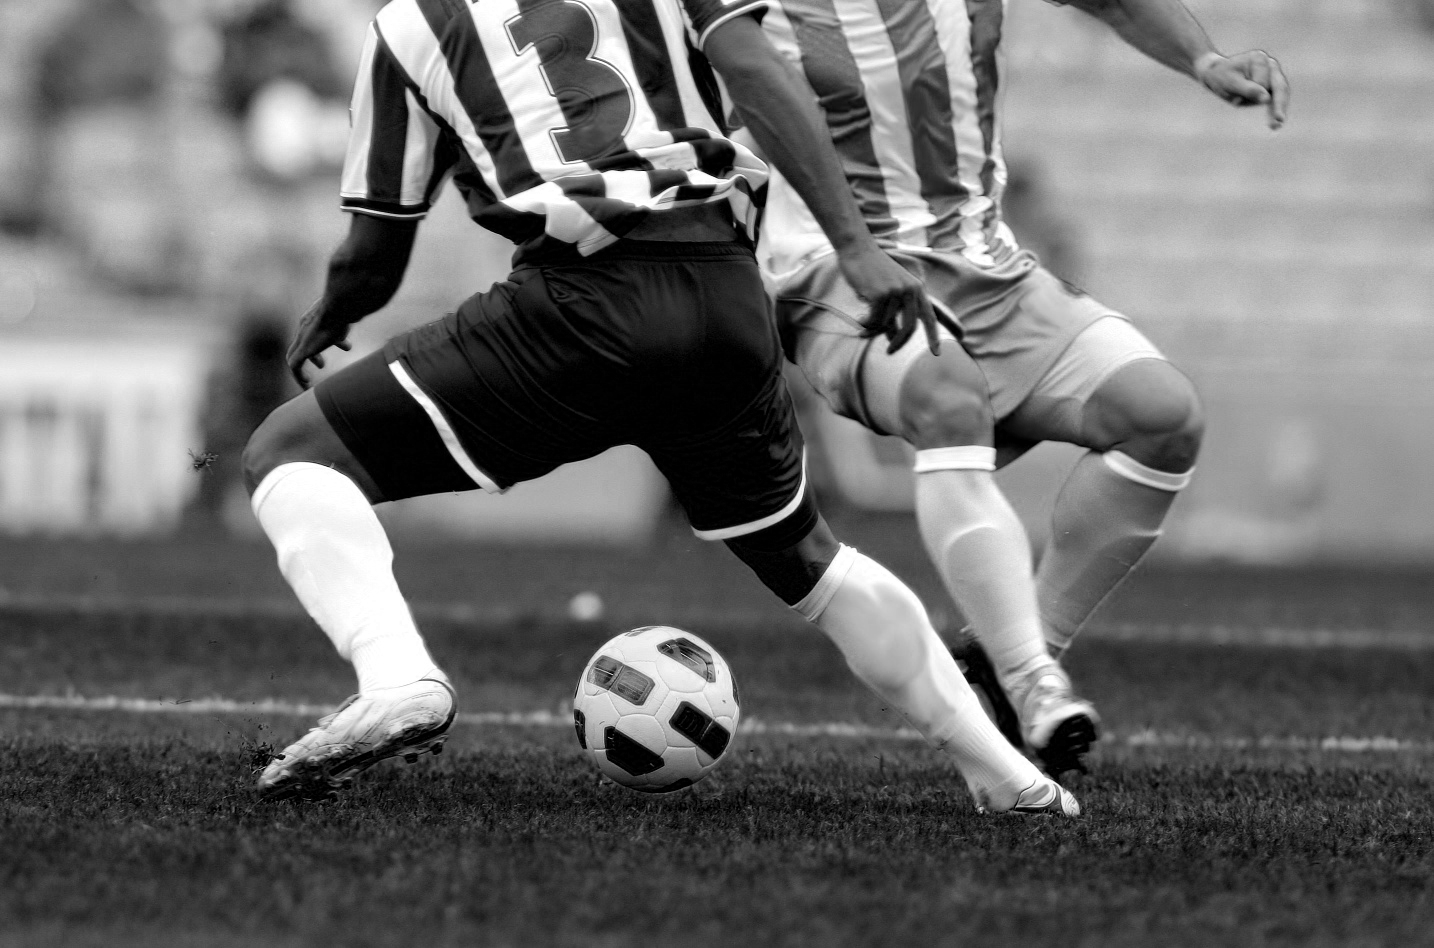

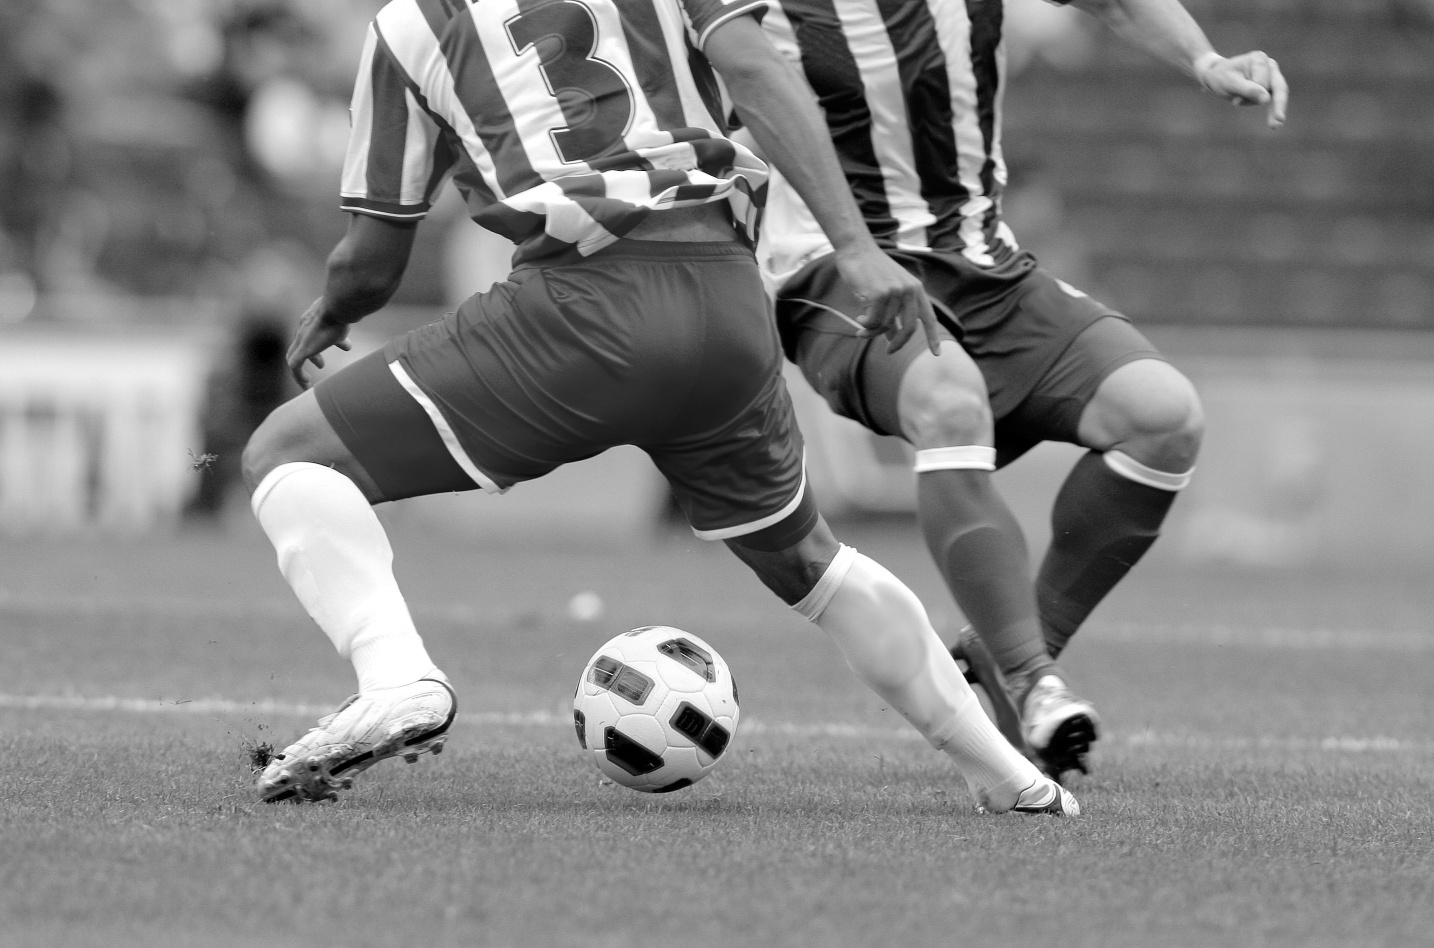

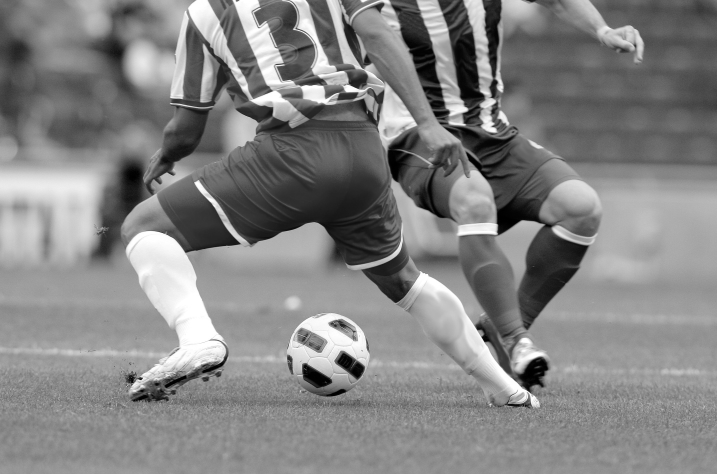

In [ ]:
import cv2 as cv
import sys
from google.colab.patches import cv2_imshow

img = cv.imread('soccer.jpg') # 영상 읽기

if img is None:
  sys.exit('파일을 찾을 수 없습니다.')

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY) # BGR 컬러 → 명암: convert color
gray_small = cv.resize(gray, dsize=(0,0), fx=0.5, fy=0.5) # 반으로 축소

cv.imwrite('soccer_gray.jpg', gray) # 영상을 파일에 저장
cv.imwrite('soccer_gray_small.jpg', gray_small)

cv2_imshow(img[:,:,0]) # BGR 중에 특정 색상 필터만 가져온 것
cv2_imshow(gray)
cv2_imshow(gray_small)

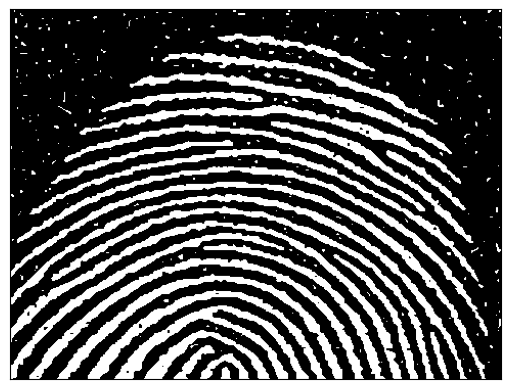

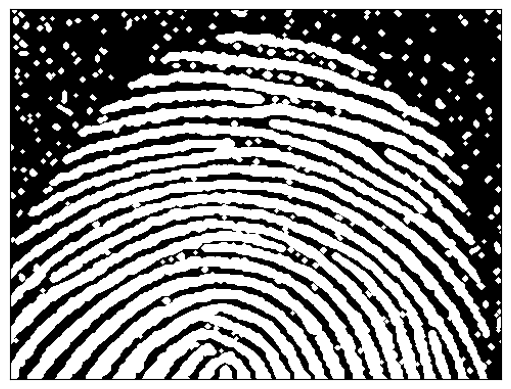

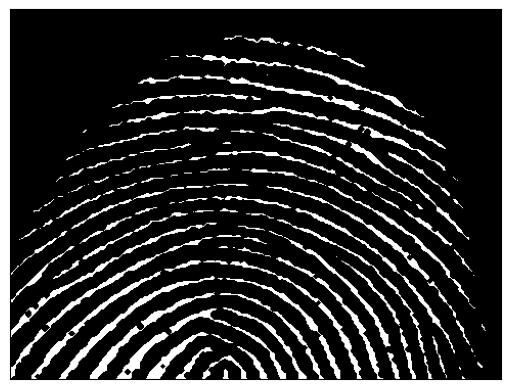

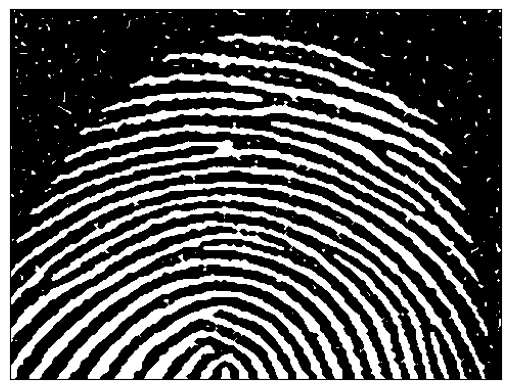

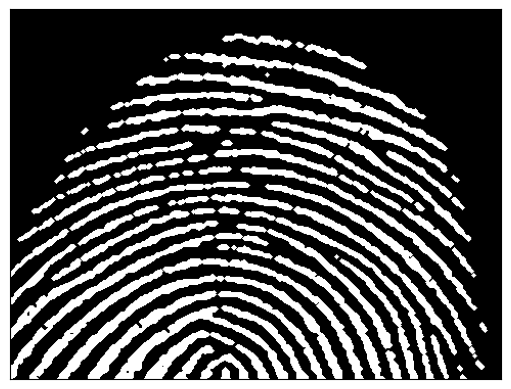

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img=cv.imread('fingerprint.png', cv.IMREAD_GRAYSCALE)

t,bin_img=cv.threshold(img, 0, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
plt.imshow(bin_img, cmap='gray',vmin=0, vmax=255), plt.xticks([]), plt.yticks([])
plt.show()

# 모폴로지 연산을 위한 구조 요소
se=np.uint8([[0,0,1,0,0],
              [0,1,1,1,0],
              [1,1,1,1,1],
              [0,1,1,1,0],
              [0,0,1,0,0]])

b_dilation = cv.dilate(bin_img,se,iterations=1) # 팽창
plt.imshow(b_dilation,cmap='gray',vmin=0,vmax=255), plt.xticks([]), plt.yticks([])
plt.show()

b_erosion = cv.erode(bin_img,se,iterations=1) # 침식
plt.imshow(b_erosion,cmap='gray',vmin=0,vmax=25), plt.xticks([]), plt.yticks([])
plt.show()

b_closing=cv.erode(cv.dilate(bin_img,se,iterations=1), se,iterations=1) # 닫기
plt.imshow(b_closing,cmap='gray',vmin=0,vmax=255), plt.xticks([]), plt.yticks([])
plt.show()

b_opening=cv.dilate(cv.erode(bin_img,se,iterations=1), se,iterations=1) # 열기
plt.imshow(b_opening,cmap='gray',vmin=0,vmax=255), plt.xticks([]), plt.yticks([])
plt.show()

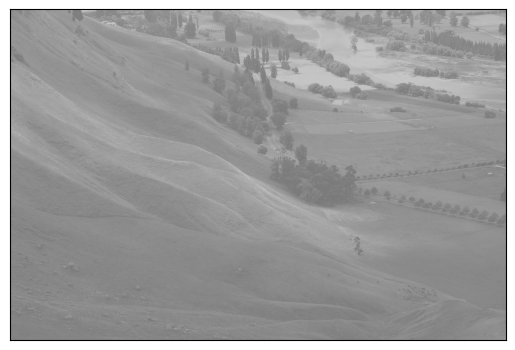

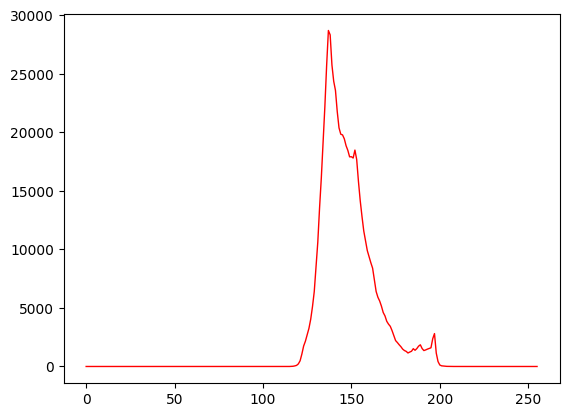

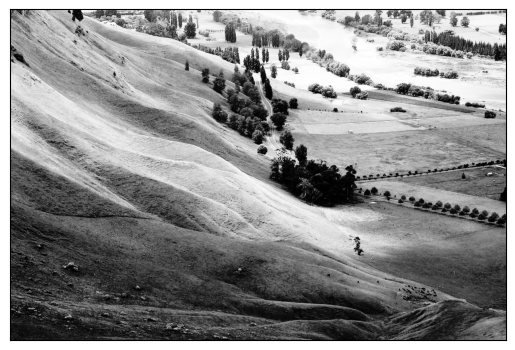

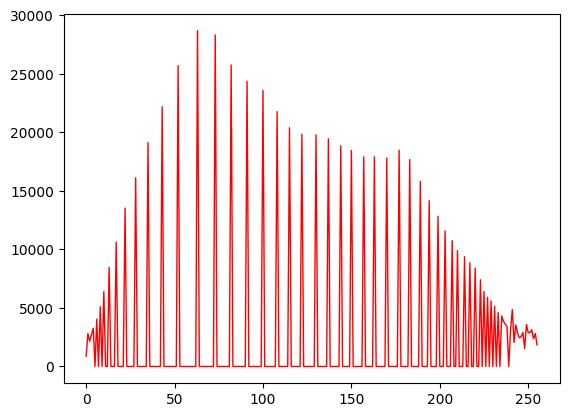

([<matplotlib.lines.Line2D at 0x7c4b2a1164e0>], None)

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt

gray=cv.imread('Unequalized_Hawkes_Bay_NZ.jpg',cv.IMREAD_GRAYSCALE)
plt.imshow(gray, cmap='gray', vmin=0, vmax=255), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([gray], [0], None, [256], [0,256]) # 히스토그램을 구해 출력
plt.plot(h,color='r',linewidth=1), plt.show()

equal=cv.equalizeHist(gray) # 히스토그램을 평활화하고 출력
plt.imshow(equal, cmap='gray', vmin=0, vmax=255), plt.xticks([]), plt.yticks([]), plt.show()

h=cv.calcHist([equal], [0], None, [256], [0,256]) # 히스토그램을 구해 출력
plt.plot(h,color='r',linewidth=1), plt.show()

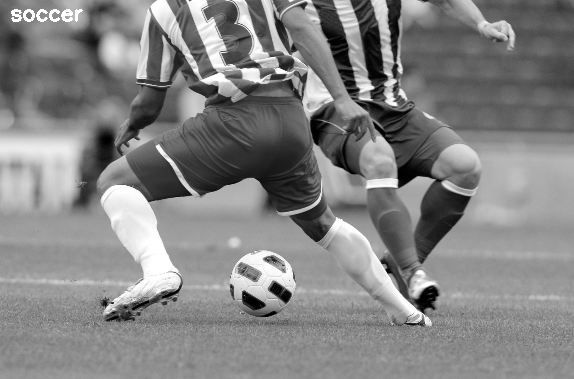

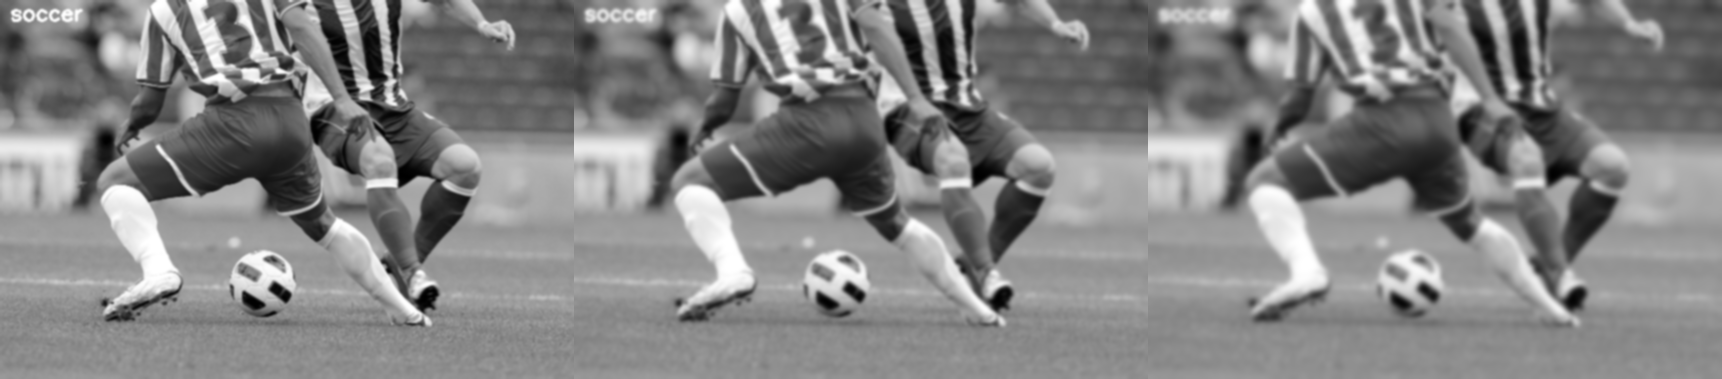

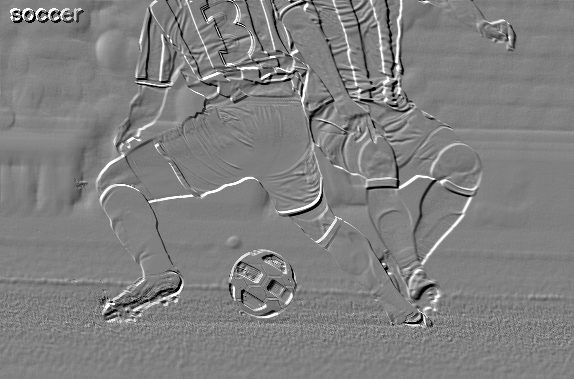

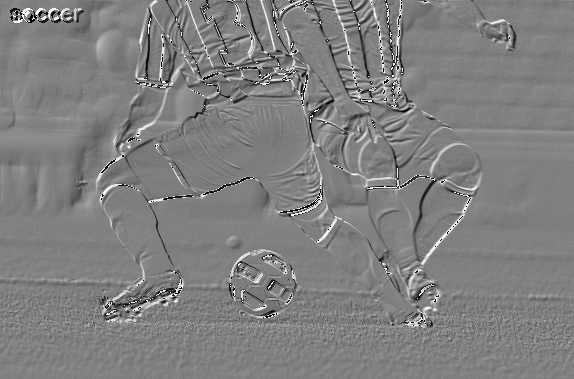

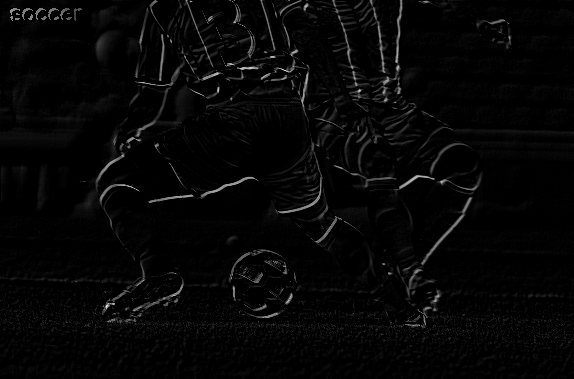

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# -----------------------------------
# 1. 이미지 읽기 및 전처리
# -----------------------------------

# 이미지 파일 읽기 (BGR 컬러)
img = cv.imread('soccer.jpg')

# 이미지 크기 축소 (가로, 세로 각각 40%)
img = cv.resize(img, dsize=(0,0), fx=0.4, fy=0.4)

# 컬러 이미지를 그레이스케일로 변환
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 그레이스케일 이미지에 텍스트 추가
# (이미지가 1채널이므로 색상은 255 하나만 사용)
cv.putText(
    gray,                 # 입력 이미지
    'soccer',              # 출력할 문자열
    (10, 20),              # 좌상단 기준 좌표 (x, y)
    cv.FONT_HERSHEY_SIMPLEX,  # 폰트 종류
    0.7,                   # 폰트 크기
    255,                   # 글자 색상 (흰색)
    2                      # 두께
)

# 원본 그레이스케일 이미지 출력
cv2_imshow(gray)

# -----------------------------------
# 2. 가우시안 블러 비교
# -----------------------------------
# 서로 다른 커널 크기의 GaussianBlur 결과를
# 가로 방향으로 붙여서 한 번에 비교

smooth = np.hstack((
    cv.GaussianBlur(gray, (5,5), 0.0),    # 약한 블러
    cv.GaussianBlur(gray, (9,9), 0.0),    # 중간 블러
    cv.GaussianBlur(gray, (15,15), 0.0)   # 강한 블러
))

# 블러 비교 이미지 출력
cv2_imshow(smooth)

# -----------------------------------
# 3. Emboss 필터 커널 정의
# -----------------------------------
# 대각선 방향의 명암 차이를 강조하는 엠보싱 커널
# (-1) 방향은 어둡게, (+1) 방향은 밝게 만들어 입체감 생성

femboss = np.array([
    [-1.0,  0.0, 0.0],
    [ 0.0,  0.0, 0.0],
    [ 0.0,  0.0, 1.0]
])

# -----------------------------------
# 4. 자료형 변환 (중요)
# -----------------------------------
# filter2D 결과에는 음수 값이 생길 수 있으므로
# uint8(0~255) 대신 int16으로 변환하여 연산

gray16 = np.int16(gray)

# -----------------------------------
# 5. 올바른 Emboss 처리
# -----------------------------------
# 1) 필터 적용
# 2) +128로 음수 영역을 회색 중심으로 이동
# 3) clip으로 0~255 범위 제한
# 4) uint8로 변환하여 영상으로 사용

emboss = np.uint8(
    np.clip(
        cv.filter2D(gray16, -1, femboss) + 128,
        0,
        255
    )
)

# -----------------------------------
# 6. 잘못된 예시 ① (overflow 발생 가능)
# -----------------------------------
# clip 없이 uint8로 변환 → 값이 255 초과 시 overflow 발생

emboss_bad = np.uint8(
    cv.filter2D(gray16, -1, femboss) + 128
)

# -----------------------------------
# 7. 잘못된 예시 ② (정보 손실)
# -----------------------------------
# uint8 상태에서 바로 filter2D 수행
# → 음수 값이 0으로 잘려 엠보싱 효과가 망가짐

emboss_worse = cv.filter2D(gray, -1, femboss)

# -----------------------------------
# 8. 결과 비교 출력
# -----------------------------------

cv2_imshow(emboss)        # 정상적인 엠보싱 결과
cv2_imshow(emboss_bad)    # overflow로 깨진 결과
cv2_imshow(emboss_worse)  # 음수 손실로 흐릿한 결과

In [ ]:
dir(img)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_namespace__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__buffer__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
